#### Import useful libraries

In [1]:
from typing import Tuple, List
from pathlib import Path
from tqdm.notebook import tqdm

import numpy as np
import matplotlib.pyplot as plt

import kornia as kn
import kornia.augmentation as K

import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import Dataset, random_split, DataLoader, TensorDataset

In [1]:
import os, sys
sys.path.append(os.path.abspath('..'))

from src.models.unet import UNet
from src.training.metrics import dice_loss, dice_score
from src.training.metrics import evaluate
from src.training.train import train
from src.data.utils import Scan, Patient
from src.data.datasets import ACDCDataset, DMDDataset, merge_tensor_datasets
from src.data.custom_transforms import SimulateTags

#### Fetch both datasets

In [5]:
acdc = ACDCDataset('../../training', only_myo=True)
dmd = DMDDataset()

In [6]:
dataset = merge_tensor_datasets(acdc, dmd)

In [7]:
len(dataset)

993

In [8]:
image, label = dataset[50]

In [2]:
model = UNet(n_channels=1, n_classes=2, bilinear=True).double()

In [9]:
outputs = model(image.unsqueeze(0))

In [16]:
label.unsqueeze(0).long().shape

torch.Size([1, 256, 256])

In [14]:
dice_score(outputs, label.unsqueeze(0).long())

tensor([0.5909, 0.0147], dtype=torch.float64, grad_fn=<MeanBackward1>)

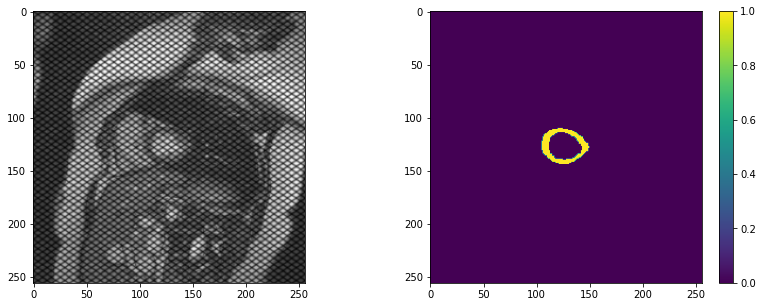

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

im = ax[0].imshow(image[0], cmap='gray')
la = ax[1].imshow(label)
fig.colorbar(la)